In [29]:
import pandas as pd
import numpy as np
data_rfe=pd.read_csv('norm_guizhou.csv')
data_rfe=np.array(data_rfe)
fea=data_rfe[:,:49]
target=data_rfe[:,49]
x_test=fea[:170,:]
y_test=target[:170]
x_train=fea[170:,:]
y_train=target[170:]

# SVM-RFE_RELIEF

In [30]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,alpha,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            #print(relief_score)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            #print(rfe_score)
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            #print(total_score)
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
    def sele_feature(self,alpha,optim_featur_num):
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            if len(candi_fea)==optim_featur_num:
                return candi_fea

In [31]:
rfe_relief_model=rfe_relief_SVM(x_train,y_train,0.1)

In [32]:
aver_mean_lis1,F_measure_lis1=rfe_relief_model.featu_score(0.15,5)
print(aver_mean_lis1,F_measure_lis1)

[0.7820515162586774, 0.7917506132887937, 0.7891995928806305, 0.7902265253927657, 0.794309462915601, 0.7932838352732398, 0.78561772535101, 0.7886867790594498, 0.7902160864345739, 0.7917480035492458, 0.7927697165822851, 0.7963398402839397, 0.7948079231692677, 0.7922582076308785, 0.7948131426483637, 0.7948079231692677, 0.7922582076308784, 0.7937888198757764, 0.7948066182994937, 0.7932760060545958, 0.7968552638446683, 0.8014457957095882, 0.8019586095307689, 0.7999125737251422, 0.8019533900516727, 0.7994010647737356, 0.8009303721488596, 0.7999086591158203, 0.8014405762304921, 0.8004175583276789, 0.7973550289681091, 0.7968500443655723, 0.7978678427892897, 0.797358943577431, 0.7988882509525549, 0.7912286653791951, 0.7917388694608278, 0.7927579727543191, 0.792757972754319, 0.7917323451119579, 0.7963346208048436, 0.7942911947387651, 0.7937796857873585, 0.7958205021138891, 0.795820502113889, 0.7942898898689911, 0.7968409102771543, 0.7937796857873585, 0.7912273605094212] [0.7799118348890411, 0.79

In [33]:
aver_mean_lis2,F_measure_lis2=rfe_relief_model.featu_score(0.25,5)
print(aver_mean_lis2,F_measure_lis2)

[0.7820515162586774, 0.7917506132887937, 0.7891995928806305, 0.7902265253927657, 0.794309462915601, 0.7932838352732398, 0.78561772535101, 0.7886867790594498, 0.7902160864345739, 0.7917480035492458, 0.7948131426483637, 0.7932812255336917, 0.7953194321206744, 0.795830941072081, 0.795836160551177, 0.7927710214520591, 0.7948092280390416, 0.7932799206639177, 0.7932747011848218, 0.7932760060545958, 0.795828331332533, 0.7963398402839397, 0.7958270264627589, 0.7953155175113522, 0.8019533900516727, 0.7994010647737356, 0.7983741322616004, 0.798884336343233, 0.7993971501644135, 0.7978652330497417, 0.8004175583276789, 0.7999073542460462, 0.7993984550341876, 0.7932760060545958, 0.7988882509525549, 0.7912286653791951, 0.7917388694608278, 0.7927579727543191, 0.7937849052664544, 0.792760582493867, 0.7922503784122344, 0.7912234459000992, 0.7907145466882405, 0.7912195312907773, 0.7902030377368339, 0.7902030377368339, 0.7886737303617098, 0.7937796857873585, 0.7912273605094212] [0.7799118348890411, 0.7902

In [34]:
aver_mean_lis3,F_measure_lis3=rfe_relief_model.featu_score(0.35,5)
print(aver_mean_lis3,F_measure_lis3)

[0.7820515162586774, 0.7917506132887937, 0.7891995928806305, 0.7902265253927657, 0.794309462915601, 0.7932838352732398, 0.78561772535101, 0.7886867790594498, 0.7902160864345739, 0.7917480035492458, 0.7948131426483637, 0.7927697165822851, 0.7917493084190198, 0.794301633696957, 0.795832245941855, 0.7937901247455504, 0.7963424500234877, 0.7948118377785898, 0.7937901247455504, 0.7943003288271832, 0.7917480035492458, 0.7917480035492458, 0.7932799206639177, 0.7953155175113522, 0.7948066182994937, 0.8004227778067747, 0.8024675087426274, 0.798884336343233, 0.7993971501644135, 0.7978652330497417, 0.8004175583276789, 0.8014392713607181, 0.7988895558223289, 0.797358943577431, 0.7932747011848218, 0.7932760060545958, 0.7902108669554778, 0.7922542930215564, 0.794295109348087, 0.7927618873636411, 0.7932747011848218, 0.7886685108826139, 0.7896889190458792, 0.7891787149642465, 0.7891774100944724, 0.7902004279972858, 0.7886737303617098, 0.7937796857873585, 0.7912273605094212] [0.7799118348890411, 0.7902

In [35]:
aver_mean_lis4,F_measure_lis4=rfe_relief_model.featu_score(0.45,5)
print(aver_mean_lis4,F_measure_lis4)

[0.7820515162586774, 0.7917506132887937, 0.7891995928806305, 0.7902265253927657, 0.7897150164413593, 0.7927788506707031, 0.7948157523879118, 0.7902173913043479, 0.7953207369904484, 0.7932773109243698, 0.7948131426483637, 0.7927697165822851, 0.7922595125006524, 0.7932773109243698, 0.7932773109243698, 0.7927644971031891, 0.7963424500234877, 0.7948118377785898, 0.7937901247455504, 0.7943003288271832, 0.7917480035492458, 0.7917480035492458, 0.7932799206639177, 0.7932786157941437, 0.7897019677436192, 0.7958270264627589, 0.794293804478313, 0.7942911947387652, 0.7932694817057258, 0.7932681768359519, 0.7922490735424604, 0.7907184612975625, 0.7896967482645232, 0.7912273605094212, 0.7927579727543191, 0.7942898898689912, 0.7922464638029124, 0.794296414217861, 0.7917414792003757, 0.7927618873636411, 0.7932747011848218, 0.7886685108826139, 0.7896889190458792, 0.7891787149642465, 0.7891774100944724, 0.7902004279972858, 0.7886737303617098, 0.7917349548515057, 0.7912273605094212] [0.7799118348890411, 

In [36]:
aver_mean_lis5,F_measure_lis5=rfe_relief_model.featu_score(0.55,5)
print(aver_mean_lis5,F_measure_lis5)

[0.7820515162586774, 0.7917506132887937, 0.7891995928806305, 0.7886880839292238, 0.7897150164413593, 0.7927788506707031, 0.7948157523879118, 0.7902173913043479, 0.7953207369904484, 0.7932773109243698, 0.7948131426483637, 0.7927697165822851, 0.7922595125006524, 0.7932773109243698, 0.7932773109243698, 0.7927644971031891, 0.7963424500234877, 0.7948118377785898, 0.7937901247455504, 0.7927697165822851, 0.7932825304034657, 0.7912377994676132, 0.7902160864345739, 0.7932786157941437, 0.7897019677436192, 0.7907236807766586, 0.7912312751187431, 0.7922503784122344, 0.794292499608539, 0.7922503784122344, 0.792760582493867, 0.7932694817057258, 0.7922490735424604, 0.7907184612975626, 0.7907158515580145, 0.7932733963150478, 0.7927618873636412, 0.7932681768359517, 0.7891839344433424, 0.7937757711780364, 0.7912221410303252, 0.7932642622266297, 0.7896889190458792, 0.7891787149642465, 0.7891774100944724, 0.7902004279972858, 0.7886737303617098, 0.7917349548515057, 0.7912273605094212] [0.7799118348890411, 

In [37]:
aver_mean_lis6,F_measure_lis6=rfe_relief_model.featu_score(0.65,5)
print(aver_mean_lis6,F_measure_lis6)

[0.7820515162586774, 0.7917506132887937, 0.7891995928806305, 0.7907315099953025, 0.7897150164413591, 0.7922686465890704, 0.7932825304034657, 0.7943055483062791, 0.7866368286445014, 0.7902186961741218, 0.7912377994676131, 0.7927697165822851, 0.7922595125006524, 0.7922569027611044, 0.7927697165822851, 0.7927684117125111, 0.7927684117125111, 0.7922555978913305, 0.7917453938096978, 0.7932773109243698, 0.7922582076308784, 0.7897045774831672, 0.791233884858291, 0.7891930685317605, 0.7881700506289473, 0.7953194321206742, 0.7932773109243698, 0.7922608173704264, 0.7891930685317605, 0.7881700506289472, 0.787147032726134, 0.7876585416775406, 0.7876585416775406, 0.787148337595908, 0.787148337595908, 0.7891865441828905, 0.787140508377264, 0.7845868782295528, 0.7866289994258573, 0.7886672060128399, 0.7850970823111854, 0.7861122709953546, 0.787137898637716, 0.7866276945560833, 0.7876494075891226, 0.7876507124588966, 0.7886737303617098, 0.7917349548515057, 0.7912273605094212] [0.7799118348890411, 0.79

In [38]:
aver_mean_lis7,F_measure_lis7=rfe_relief_model.featu_score(0.75,5)
print(aver_mean_lis7,F_measure_lis7)

[0.7820515162586774, 0.7820515162586774, 0.7902200010438958, 0.7927762409311551, 0.7937914296153243, 0.7917506132887938, 0.7953220418602224, 0.7932825304034657, 0.7953259564695443, 0.7927697165822851, 0.7932812255336917, 0.7907249856464326, 0.7932799206639177, 0.7917453938096978, 0.794297719087635, 0.7917453938096978, 0.7932747011848218, 0.7917440889399238, 0.7897019677436192, 0.7886828644501278, 0.7902147815647999, 0.7927644971031891, 0.7922542930215565, 0.7907236807766586, 0.7902121718252518, 0.7927671068427371, 0.7927684117125111, 0.7932786157941438, 0.7922569027611044, 0.794300328827183, 0.7891943734015345, 0.7907262905162064, 0.7907275953859806, 0.7902160864345739, 0.7866342189049533, 0.7830588757242027, 0.7850970823111855, 0.7845868782295528, 0.7866289994258573, 0.7886672060128399, 0.7856046766532699, 0.7850944725716373, 0.787137898637716, 0.7866276945560833, 0.7876494075891226, 0.7876507124588966, 0.7886737303617098, 0.7917349548515057, 0.7912273605094212] [0.7799118348890411, 0

In [39]:
aver_mean_lis8,F_measure_lis8=rfe_relief_model.featu_score(0.85,5)
print(aver_mean_lis8,F_measure_lis8)

[0.7820515162586774, 0.7825617203403101, 0.7907302051255285, 0.7907315099953025, 0.7902213059136698, 0.7927762409311551, 0.7958413800302729, 0.795841380030273, 0.7917493084190198, 0.7902160864345739, 0.7927658019729631, 0.7922555978913305, 0.7891943734015345, 0.7881700506289472, 0.7876585416775406, 0.7886802547105799, 0.7902108669554778, 0.7896993580040712, 0.7907184612975625, 0.7886828644501278, 0.7922582076308784, 0.7937862101362285, 0.7927658019729631, 0.7902134766950258, 0.7886828644501278, 0.7881700506289472, 0.7881687457591732, 0.787144422986586, 0.7871457278563601, 0.7845920977086487, 0.7876572368077666, 0.7845894879691007, 0.7840831984967901, 0.7830640952032987, 0.784087113106112, 0.7830588757242027, 0.7820384675609373, 0.7876520173286706, 0.7866289994258573, 0.7886672060128399, 0.7856046766532699, 0.7850944725716373, 0.787137898637716, 0.7866276945560833, 0.7876494075891226, 0.7876507124588966, 0.7886737303617098, 0.7917349548515057, 0.7912273605094212] [0.7799118348890411, 0.

In [40]:
aver_mean_lis9,F_measure_lis9=rfe_relief_model.featu_score(0.95,5)
print(aver_mean_lis9,F_measure_lis9)

[0.7820515162586774, 0.7825617203403101, 0.7907302051255285, 0.791243018946709, 0.7912443238164831, 0.7937940393548724, 0.7922634271099744, 0.794304243436505, 0.7948170572576857, 0.7948144475181377, 0.7932825304034657, 0.7963450597630356, 0.7968565687144423, 0.7943055483062791, 0.7871483375959081, 0.7902121718252518, 0.7937836003966805, 0.7937822955269065, 0.7912325799885171, 0.7942898898689912, 0.7902082572159299, 0.7902082572159299, 0.7871457278563601, 0.7917427840701498, 0.787148337595908, 0.7907236807766586, 0.7917453938096978, 0.7897045774831672, 0.7902121718252519, 0.791233884858291, 0.791233884858291, 0.791233884858291, 0.7891904587922125, 0.7902069523461558, 0.784087113106112, 0.7835677749360614, 0.7856125058719139, 0.7902134766950258, 0.7891839344433424, 0.7907145466882405, 0.7917362597212799, 0.788672425491936, 0.787141813247038, 0.7866276945560833, 0.7876494075891226, 0.7876507124588966, 0.7886737303617098, 0.7917349548515057, 0.7912273605094212] [0.7799118348890411, 0.78042

In [51]:
np.max(aver_mean_lis1[:28]),np.max(aver_mean_lis2[:28]),np.max(aver_mean_lis3[:28]),np.max(aver_mean_lis4[:28]),np.max(aver_mean_lis5[:28])

(0.8019586095307689,
 0.8019533900516727,
 0.8024675087426274,
 0.7963424500234877,
 0.7963424500234877)

In [52]:
np.max(aver_mean_lis6[:28]),np.max(aver_mean_lis7[:28]),np.max(aver_mean_lis8[:28]),np.max(aver_mean_lis9[:28])

(0.7953194321206742, 0.7953259564695443, 0.795841380030273, 0.7968565687144423)

In [53]:
np.argmax(aver_mean_lis2[:28])

24

In [54]:
aver_mean_lis2[:28]

[0.7820515162586774,
 0.7917506132887937,
 0.7891995928806305,
 0.7902265253927657,
 0.794309462915601,
 0.7932838352732398,
 0.78561772535101,
 0.7886867790594498,
 0.7902160864345739,
 0.7917480035492458,
 0.7948131426483637,
 0.7932812255336917,
 0.7953194321206744,
 0.795830941072081,
 0.795836160551177,
 0.7927710214520591,
 0.7948092280390416,
 0.7932799206639177,
 0.7932747011848218,
 0.7932760060545958,
 0.795828331332533,
 0.7963398402839397,
 0.7958270264627589,
 0.7953155175113522,
 0.8019533900516727,
 0.7994010647737356,
 0.7983741322616004,
 0.798884336343233]

# SVM-RFE

In [41]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,x_train,y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,x_train,y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
   
    def featu_subset(self,featur_num):
        kf=KFold(n_splits=5,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            if len(candi_fea)==featur_num:
                break
        return candi_fea

In [42]:
rfe_SVM_model=rfe_SVM(x_train,y_train,0.1)
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis=rfe_SVM_model.featu_score(5)

In [43]:
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis

([0.7820515162586774,
  0.7917506132887937,
  0.7891995928806305,
  0.7902265253927657,
  0.794309462915601,
  0.7932838352732398,
  0.78561772535101,
  0.7886867790594498,
  0.7902160864345739,
  0.7917480035492458,
  0.7927697165822851,
  0.7963398402839397,
  0.7948079231692677,
  0.7922582076308785,
  0.7917466986794718,
  0.7917506132887937,
  0.7963385354141657,
  0.7953142126415783,
  0.7978691476590637,
  0.7983819614802443,
  0.7948027036901717,
  0.7953155175113523,
  0.7963372305443916,
  0.7983793517406962,
  0.7978678427892897,
  0.7983793517406962,
  0.7983793517406962,
  0.7968500443655724,
  0.7978704525288376,
  0.7968487394957983,
  0.797362858186753,
  0.7948066182994937,
  0.7968461297562502,
  0.7963359256746176,
  0.7958270264627589,
  0.7948053134297197,
  0.7963372305443916,
  0.7978678427892897,
  0.7948000939506238,
  0.7942898898689912,
  0.7978639281799677,
  0.8009251526697636,
  0.8014353567513961,
  0.8014366616211703,
  0.797349809489013,
  0.79479617934

# SVM-RELIEF

In [44]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        featu_num=self.X_train.shape[1]
        relief_fea_score=reliefF.reliefF(self.X_train,self.Y_train)
        relief_candi_fea=list(reliefF.feature_ranking(relief_fea_score))
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        for i in range(featu_num):
            estimator=SVC(kernel='linear',C=self.C)
            candi_fea=relief_candi_fea[:(i+1)]
            aver=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i]=aver
            F_lis[i]=F1 
        return aver_lis,F_lis

In [45]:
relief_SVM_model=relief_SVM(x_train,y_train,0.1)
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis=relief_SVM_model.featu_score(5)

In [46]:
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis

([0.7820515162586774,
  0.7820515162586774,
  0.7902200010438958,
  0.7897111018320371,
  0.7917532230283417,
  0.7891982880108566,
  0.7897071872227153,
  0.7897084920924893,
  0.7876650660264104,
  0.7886854741896758,
  0.785620335090558,
  0.7902186961741219,
  0.7917453938096978,
  0.7917466986794718,
  0.7922569027611044,
  0.7897045774831672,
  0.7897045774831671,
  0.7881726603684951,
  0.7896993580040712,
  0.7902121718252518,
  0.7876611514170886,
  0.7927631922334151,
  0.7871418132470379,
  0.7835677749360614,
  0.7845894879691008,
  0.7851009969205073,
  0.78561120100214,
  0.785609896132366,
  0.7840805887572421,
  0.7835651651965134,
  0.7820332480818414,
  0.7805039407067176,
  0.7799937366250849,
  0.7850970823111855,
  0.7881648311498513,
  0.788675035231484,
  0.7917427840701498,
  0.7830575708544287,
  0.787140508377264,
  0.785609896132366,
  0.7861227099535466,
  0.7881635262800772,
  0.787141813247038,
  0.7866276945560833,
  0.7861174904744507,
  0.78765071245889

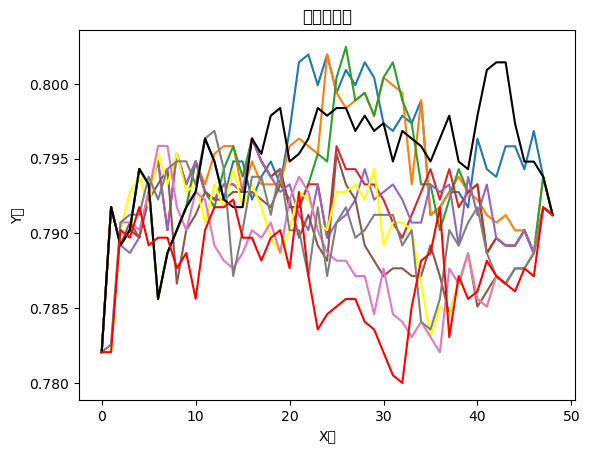

In [28]:
import matplotlib.pyplot as plt

fea_num=[i for i in range(49)]

# 创建图形
plt.plot(fea_num, aver_mean_lis1)
plt.plot(fea_num, aver_mean_lis2)
plt.plot(fea_num, aver_mean_lis3)
plt.plot(fea_num, aver_mean_lis4)
plt.plot(fea_num, aver_mean_lis5)
plt.plot(fea_num, aver_mean_lis6)
plt.plot(fea_num, aver_mean_lis7,color="yellow")
plt.plot(fea_num, aver_mean_lis8)
plt.plot(fea_num, aver_mean_lis9)
plt.plot(fea_num, rfe_SVM_aver_mean_lis,color="black")
plt.plot(fea_num, relief_SVM_aver_mean_lis,color="red")



# 添加标题和标签
plt.title('简单折线图')
plt.xlabel('X轴')
plt.ylabel('Y轴')

# 显示图形
plt.show()


In [47]:
guizhou_accuracy=[]
guizhou_accuracy.append(aver_mean_lis1)
guizhou_accuracy.append(aver_mean_lis2)
guizhou_accuracy.append(aver_mean_lis3)
guizhou_accuracy.append(aver_mean_lis4)
guizhou_accuracy.append(aver_mean_lis5)
guizhou_accuracy.append(aver_mean_lis6)
guizhou_accuracy.append(aver_mean_lis7)
guizhou_accuracy.append(aver_mean_lis8)
guizhou_accuracy.append(aver_mean_lis9)
guizhou_accuracy.append(rfe_SVM_aver_mean_lis)
guizhou_accuracy.append(relief_SVM_aver_mean_lis)

In [48]:
colu=[i for i in range(1,50)]
guizhou_acurracy_dataframe=pd.DataFrame(columns=colu,data=np.array(guizhou_accuracy))
guizhou_acurracy_dataframe.to_csv("guizhou_accuracy.csv")

In [49]:
guizhou_F_measure=[]
guizhou_F_measure.append(F_measure_lis1)
guizhou_F_measure.append(F_measure_lis2)
guizhou_F_measure.append(F_measure_lis3)
guizhou_F_measure.append(F_measure_lis4)
guizhou_F_measure.append(F_measure_lis5)
guizhou_F_measure.append(F_measure_lis6)
guizhou_F_measure.append(F_measure_lis7)
guizhou_F_measure.append(F_measure_lis8)
guizhou_F_measure.append(F_measure_lis9)
guizhou_F_measure.append(rfe_SVM_F_measure_lis)
guizhou_F_measure.append(relief_SVM_F_measure_lis)

In [50]:
colu=[i for i in range(1,50)]
guizhou_F_measure_dataframe=pd.DataFrame(columns=colu,data=np.array(guizhou_F_measure))
guizhou_F_measure_dataframe.to_csv("guizhou_F_measure.csv")